In [157]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import classification_report

In [118]:
df = pd.read_csv("~/Downloads/heart.csv")
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [119]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [120]:
lst = []
for change in range(len(df['Sex'])):
    if df['Sex'][change] == 'M':
        lst.append("1")
    else: 
        df['Sex'][change] == 'F'
        lst.append('0')
    
df['Sex'] = lst

In [121]:
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [122]:
enc = OrdinalEncoder()
df[['SexEn', 'chestpain', 'restingecg', 'exerciseangina', 'st_slope']] = enc.fit_transform(df[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']]) 
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,SexEn,chestpain,restingecg,exerciseangina,st_slope
0,40,1,ATA,140,289,0,Normal,172,N,0.0,Up,0,1.0,1.0,1.0,0.0,2.0
1,49,0,NAP,160,180,0,Normal,156,N,1.0,Flat,1,0.0,2.0,1.0,0.0,1.0
2,37,1,ATA,130,283,0,ST,98,N,0.0,Up,0,1.0,1.0,2.0,0.0,2.0
3,48,0,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.0,0.0,1.0,1.0,1.0
4,54,1,NAP,150,195,0,Normal,122,N,0.0,Up,0,1.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,1,TA,110,264,0,Normal,132,N,1.2,Flat,1,1.0,3.0,1.0,0.0,1.0
914,68,1,ASY,144,193,1,Normal,141,N,3.4,Flat,1,1.0,0.0,1.0,0.0,1.0
915,57,1,ASY,130,131,0,Normal,115,Y,1.2,Flat,1,1.0,0.0,1.0,1.0,1.0
916,57,0,ATA,130,236,0,LVH,174,N,0.0,Flat,1,0.0,1.0,0.0,0.0,1.0


In [123]:
new_df = df.drop(columns=['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'])
new_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,SexEn,chestpain,restingecg,exerciseangina,st_slope
0,40,140,289,0,172,0.0,0,1.0,1.0,1.0,0.0,2.0
1,49,160,180,0,156,1.0,1,0.0,2.0,1.0,0.0,1.0
2,37,130,283,0,98,0.0,0,1.0,1.0,2.0,0.0,2.0
3,48,138,214,0,108,1.5,1,0.0,0.0,1.0,1.0,1.0
4,54,150,195,0,122,0.0,0,1.0,2.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1.0,3.0,1.0,0.0,1.0
914,68,144,193,1,141,3.4,1,1.0,0.0,1.0,0.0,1.0
915,57,130,131,0,115,1.2,1,1.0,0.0,1.0,1.0,1.0
916,57,130,236,0,174,0.0,1,0.0,1.0,0.0,0.0,1.0


In [124]:
new_df.info

<bound method DataFrame.info of      Age  RestingBP  Cholesterol  FastingBS  MaxHR  Oldpeak  HeartDisease  \
0     40        140          289          0    172      0.0             0   
1     49        160          180          0    156      1.0             1   
2     37        130          283          0     98      0.0             0   
3     48        138          214          0    108      1.5             1   
4     54        150          195          0    122      0.0             0   
..   ...        ...          ...        ...    ...      ...           ...   
913   45        110          264          0    132      1.2             1   
914   68        144          193          1    141      3.4             1   
915   57        130          131          0    115      1.2             1   
916   57        130          236          0    174      0.0             1   
917   38        138          175          0    173      0.0             0   

     SexEn  chestpain  restingecg  exercise

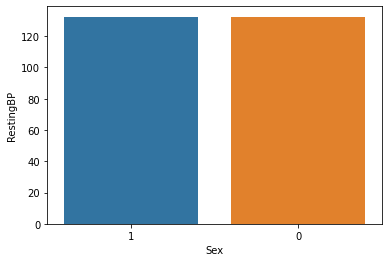

In [125]:
sns.barplot(x="Sex", y="RestingBP", ci = None, data=df);

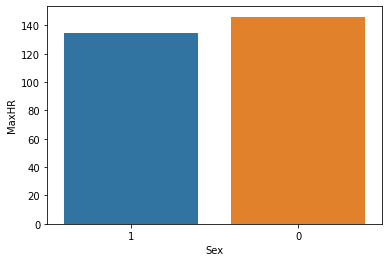

In [126]:
sns.barplot(x="Sex", y="MaxHR", ci = None, data=df);

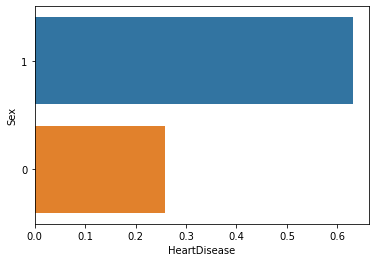

In [127]:
sns.barplot(x="HeartDisease", y="Sex", ci = None, data=df);

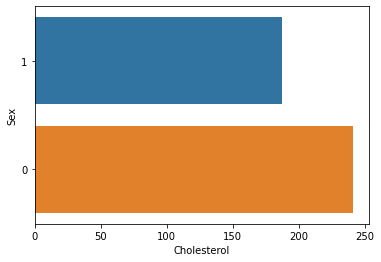

In [128]:
sns.barplot(x="Cholesterol", y="Sex", ci = None, data=df);

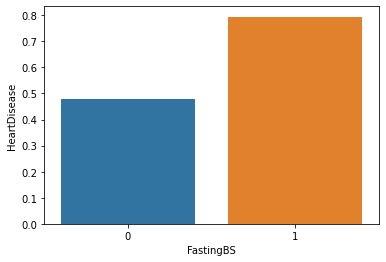

In [129]:
sns.barplot(x="FastingBS", y="HeartDisease", ci = None, data=df);

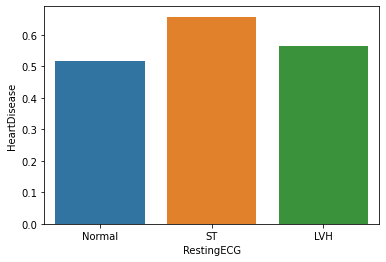

In [130]:
sns.barplot(x="RestingECG", y="HeartDisease", ci = None, data=df);

<AxesSubplot:>

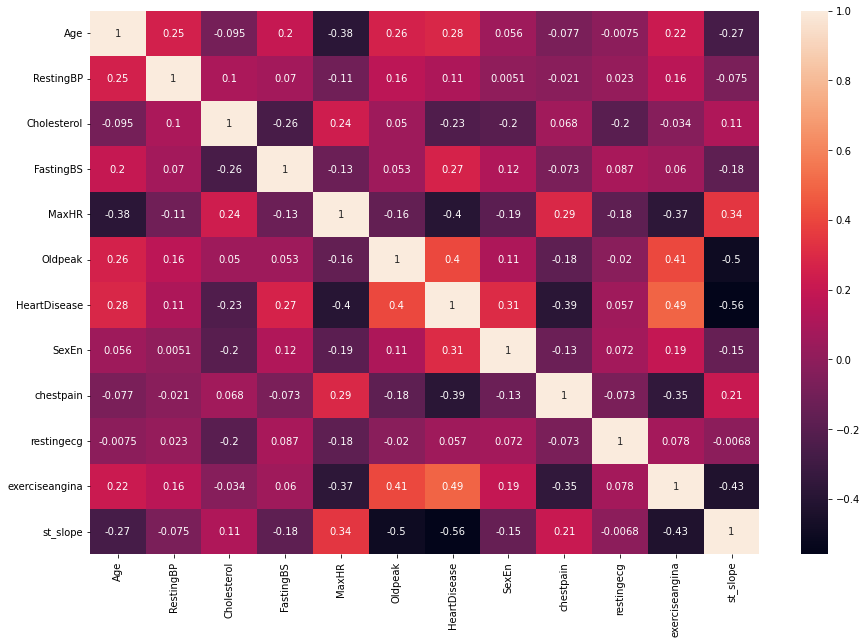

In [131]:
plt.figure(figsize=(15, 10))
sns.heatmap(new_df.corr(), annot=True)

In [132]:
new = new_df.drop(['Oldpeak', 'chestpain'], axis =1)
new

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,HeartDisease,SexEn,restingecg,exerciseangina,st_slope
0,40,140,289,0,172,0,1.0,1.0,0.0,2.0
1,49,160,180,0,156,1,0.0,1.0,0.0,1.0
2,37,130,283,0,98,0,1.0,2.0,0.0,2.0
3,48,138,214,0,108,1,0.0,1.0,1.0,1.0
4,54,150,195,0,122,0,1.0,1.0,0.0,2.0
...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1,1.0,1.0,0.0,1.0
914,68,144,193,1,141,1,1.0,1.0,0.0,1.0
915,57,130,131,0,115,1,1.0,1.0,1.0,1.0
916,57,130,236,0,174,1,0.0,0.0,0.0,1.0


In [133]:
y = new['HeartDisease']
X = new.drop(columns=['HeartDisease'], axis=1)

In [143]:
sample = SMOTE(random_state = 45)
X, y = sample.fit_resample(X, y)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calcu_mult(new):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

  return vif

In [ ]:
calcu_mult(new)

In [ ]:
X.shape

In [ ]:
y.shape

In [ ]:
X_train, X_test,  y_train, y_test= train_test_split(X, y, test_size = 0.20, random_state = 45, train_size = 0.80)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
std_scale = MinMaxScaler() 
X_train_norm = pd.DataFrame(std_scale.fit_transform(X_train))

In [ ]:
X_train_, X_test_, y_train_, y_test_ = train_test_split(X_train_norm, y_train, test_size = .20, random_state = 45)
X_train_

In [140]:
pca = PCA(n_components= 9)
model = pca.fit(X_train_)
PCA(n_components= 9)
print(model.explained_variance_ratio_)        

[0.35742349 0.18828465 0.16564339 0.11082273 0.07319892 0.04390508
 0.03153181 0.02041869 0.00877124]


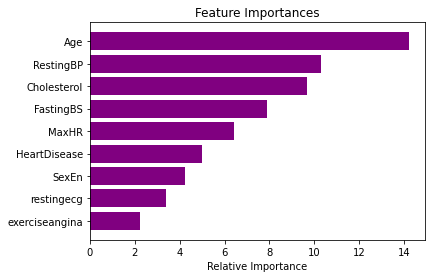

In [144]:
features = new.columns
importances = model.singular_values_
indices = np.argsort(importances)[-10:]
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='purple', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [147]:
model = LogisticRegression()
gen = model.fit(X_train_,  y_train_)
gen

LogisticRegression()

In [148]:
coef_deter = gen.score(X_train_, y_train_)
coef_deter

0.8459167950693375

In [149]:
1 - (1-gen.score(X_train_, y_train_))*(len(y_train_)-1)/(len(y_train_)-X_train_.shape[1]-1)

0.8437466090843986

In [150]:
y_predict = gen.predict(X_test_)

In [151]:
cf_matrix = confusion_matrix(y_test_, y_predict)
print(cf_matrix)

[[71 15]
 [10 67]]


In [154]:
cv = RepeatedKFold(n_splits = 10, n_repeats =4, random_state =1)
cv

RepeatedKFold(n_repeats=4, n_splits=10, random_state=1)

In [155]:
score = cross_val_score(gen, X_test_, y_test_, scoring = "accuracy", cv = cv, n_jobs = 1, error_score = "raise")
np.mean(score)

0.8310661764705884

In [159]:
classification_report(y_test_, y_predict)
print(classification_report(y_test_, y_predict))

              precision    recall  f1-score   support

           0       0.88      0.83      0.85        86
           1       0.82      0.87      0.84        77

    accuracy                           0.85       163
   macro avg       0.85      0.85      0.85       163
weighted avg       0.85      0.85      0.85       163

